#### 1. Data collection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 2.9 MB/s 


In [4]:
import FinanceDataReader as fdr
import html5lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [75]:
# KOSPI index, 2010 ~ Now
kospi = fdr.DataReader('KS11', '2009-01-01')

# Indexes, 2010 ~ Now
dji = fdr.DataReader('DJI', '2009-01-01') # Dow Jones Industrial(DJI)
sp500 = fdr.DataReader('US500', '2009-01-01') # S&P 500 지수 (NYSE)

# FX 환율, 2010 ~ 현재
usdkrw = fdr.DataReader('USD/KRW', '2009-01-01') # 달러 원화
usdeur = fdr.DataReader('USD/EUR', '2009-01-01') # 달러 유로화
usdcny = fdr.DataReader('USD/CNY', '2009-01-01') # 달러 위엔화

# 상품 선물 가격 데이터
gold = fdr.DataReader('ZG', '2009-01-01') # 금 선물 (ICE)

# 채권 수익률
kr1yt = fdr.DataReader('KR1YT=RR', '2009-01-01') # 1년만기 한국국채 수익률
kr10yt = fdr.DataReader('KR10YT=RR', '2009-01-01') # 10년만기 한국국채 수익률
us1yt = fdr.DataReader('US1MT=X', '2009-01-01') # 1개월 만기 미국국채 수익률
us10yt = fdr.DataReader('US10YT=X', '2009-01-01') # 10년 만기 미국국채 수익률

# FRED 데이터
nasdaq = fdr.DataReader('NASDAQCOM', '2009-01-01', data_source='fred') # NASDAQCOM 나스닥종합지수
# hou_nas = fdr.DataReader(['HSN1F', 'NASDAQCOM'], data_source='fred') # HSN1F 주택판매지수, NASDAQCOM 나스닥종합지수

sse = fdr.DataReader('005930', '2009-01-01')

#### 2. Preprocessing

In [76]:
nasdaq.head()

,NASDAQCOM
DATE,
2009-01-02,1632.21
2009-01-05,1628.03
2009-01-06,1652.38
2009-01-07,1599.06
2009-01-08,1617.01


In [77]:
kospi_m = pd.DataFrame(data=kospi.Close.values, columns=['kospi'], index=kospi.index)
dji_m = pd.DataFrame(data=dji.Close.values, columns=['dji'], index=dji.index)
sp500_m = pd.DataFrame(data=sp500.Close.values, columns=['sp500'], index=sp500.index)

usdkrw_m = pd.DataFrame(data=usdkrw.Close.values, columns=['usdkrw'], index=usdkrw.index)
usdeur_m = pd.DataFrame(data=usdeur.Close.values, columns=['usdeur'], index=usdeur.index)
usdcny_m = pd.DataFrame(data=usdcny.Close.values, columns=['usdcny'], index=usdcny.index)

gold_m = pd.DataFrame(data=gold.Close.values, columns=['gold'], index=gold.index)

kr1yt_m = pd.DataFrame(data=kr1yt.Close.values, columns=['kr1yt'], index=kr1yt.index)
kr10yt_m = pd.DataFrame(data=kr10yt.Close.values, columns=['kr10yt'], index=kr10yt.index)
us1yt_m = pd.DataFrame(data=us1yt.Close.values, columns=['us1yt'], index=us1yt.index)
us10yt_m = pd.DataFrame(data=us10yt.Close.values, columns=['us10yt'], index=us10yt.index)

nasdaq_m = pd.DataFrame(data=nasdaq.NASDAQCOM.values, columns=['nasdaq'], index=nasdaq.index)

sse_m = pd.DataFrame(data=sse.Close.values, columns=['sse'], index=sse.index)

In [78]:
x_columns = [kospi_m, dji_m, sp500_m, usdkrw_m, usdeur_m, usdcny_m, gold_m, \
             kr1yt_m, kr10yt_m, us1yt_m, us10yt_m, nasdaq_m, sse_m]

In [79]:
df = pd.concat(x_columns, axis=1)

In [80]:
df.head()

,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,us1yt,us10yt,nasdaq,sse
2009-01-01,NaN,NaN,NaN,1263.0,0.7147,6.8230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,1157.40,9034.69,931.80,1321.0,0.7206,6.8230,878.8,3.17,4.23,0.020,2.361,1632.21,9400.0
2009-01-05,1173.57,8952.89,927.45,1315.0,0.7350,6.8305,857.2,2.93,4.22,0.046,2.485,1628.03,9520.0
2009-01-06,1194.28,9015.10,934.70,1312.0,0.7401,6.8365,865.4,2.88,4.26,0.041,2.450,1652.38,9960.0
2009-01-07,1228.17,8769.70,906.65,1292.7,0.7333,6.8335,841.1,2.95,4.31,0.051,2.498,1599.06,10480.0


In [83]:
df.tail()

,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,us1yt,us10yt,nasdaq,sse
2022-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.340,3.490,1.1417,3.174,NaN,NaN
2022-06-13,2504.51,30518.06,3749.63,1291.68,0.9607,6.7530,1831.8,2.426,3.644,1.1060,3.362,10809.23,62100.0
2022-06-14,2492.97,30365.95,3735.48,1289.57,0.9598,6.7395,1813.5,2.445,3.697,1.1590,3.479,10828.35,61900.0
2022-06-15,2447.38,30668.27,3789.99,1277.90,0.9573,6.7128,1819.6,2.600,3.803,1.1720,3.292,NaN,60700.0
2022-06-16,2452.49,NaN,NaN,1286.73,0.9585,6.7011,NaN,2.514,3.759,1.1796,3.301,NaN,60800.0


In [81]:
# df_dropna = df.dropna(axis=0, how='any')
df_dropna = df.fillna(method='ffill')

In [84]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4405 entries, 2009-01-01 to 2022-06-16
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kospi   4404 non-null   float64
 1   dji     4404 non-null   float64
 2   sp500   4404 non-null   float64
 3   usdkrw  4405 non-null   float64
 4   usdeur  4405 non-null   float64
 5   usdcny  4405 non-null   float64
 6   gold    4404 non-null   float64
 7   kr1yt   4404 non-null   float64
 8   kr10yt  4404 non-null   float64
 9   us1yt   4404 non-null   float64
 10  us10yt  4404 non-null   float64
 11  nasdaq  4404 non-null   float64
 12  sse     4404 non-null   float64
dtypes: float64(13)
memory usage: 481.8 KB


In [85]:
df_dropna = df_dropna.drop(['2009-01-01'])

In [86]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4404 entries, 2009-01-02 to 2022-06-16
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kospi   4404 non-null   float64
 1   dji     4404 non-null   float64
 2   sp500   4404 non-null   float64
 3   usdkrw  4404 non-null   float64
 4   usdeur  4404 non-null   float64
 5   usdcny  4404 non-null   float64
 6   gold    4404 non-null   float64
 7   kr1yt   4404 non-null   float64
 8   kr10yt  4404 non-null   float64
 9   us1yt   4404 non-null   float64
 10  us10yt  4404 non-null   float64
 11  nasdaq  4404 non-null   float64
 12  sse     4404 non-null   float64
dtypes: float64(13)
memory usage: 481.7 KB


In [87]:
full_df = df_dropna.reset_index()

In [88]:
full_df.head()

,index,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,us1yt,us10yt,nasdaq,sse
0,2009-01-02,1157.40,9034.69,931.80,1321.0,0.7206,6.8230,878.8,3.17,4.23,0.020,2.361,1632.21,9400.0
1,2009-01-05,1173.57,8952.89,927.45,1315.0,0.7350,6.8305,857.2,2.93,4.22,0.046,2.485,1628.03,9520.0
2,2009-01-06,1194.28,9015.10,934.70,1312.0,0.7401,6.8365,865.4,2.88,4.26,0.041,2.450,1652.38,9960.0
3,2009-01-07,1228.17,8769.70,906.65,1292.7,0.7333,6.8335,841.1,2.95,4.31,0.051,2.498,1599.06,10480.0
4,2009-01-08,1205.70,8742.46,909.73,1330.0,0.7286,6.8347,853.9,2.84,4.20,0.041,2.445,1617.01,10160.0


In [90]:
# feature 추가할 것들 고려

# kospi 이동평균선 추가

full_df['kospi_sma5'] = full_df['kospi'].rolling(5).mean()
full_df['kospi_sma20'] = full_df['kospi'].rolling(20).mean()
full_df['kospi_sma100'] = full_df['kospi'].rolling(100).mean()
full_df['kospi_sma200'] = full_df['kospi'].rolling(200).mean()

# dji 이동평균선 추가

full_df['dji_sma5'] = full_df['dji'].rolling(5).mean()
full_df['dji_sma20'] = full_df['dji'].rolling(20).mean()
full_df['dji_sma100'] = full_df['dji'].rolling(100).mean()
full_df['dji_sma200'] = full_df['dji'].rolling(200).mean()


# sp500 이동평균선 추가

full_df['sp500_sma5'] = full_df['sp500'].rolling(5).mean()
full_df['sp500_sma20'] = full_df['sp500'].rolling(20).mean()
full_df['sp500_sma100'] = full_df['sp500'].rolling(100).mean()
full_df['sp500_sma200'] = full_df['sp500'].rolling(200).mean()

# usdkrw 이동평균선 추가

full_df['usdkrw_sma5'] = full_df['usdkrw'].rolling(5).mean()
full_df['usdkrw_sma20'] = full_df['usdkrw'].rolling(20).mean()
full_df['usdkrw_sma100'] = full_df['usdkrw'].rolling(100).mean()
full_df['usdkrw_sma200'] = full_df['usdkrw'].rolling(200).mean()

# gold 이동평균선 추가

full_df['gold_sma5'] = full_df['gold'].rolling(5).mean()
full_df['gold_sma20'] = full_df['gold'].rolling(20).mean()
full_df['gold_sma100'] = full_df['gold'].rolling(100).mean()
full_df['gold_sma200'] = full_df['gold'].rolling(200).mean()

# nasdaq 이동평균선 추가

full_df['nasdaq_sma5'] = full_df['nasdaq'].rolling(5).mean()
full_df['nasdaq_sma20'] = full_df['nasdaq'].rolling(20).mean()
full_df['nasdaq_sma100'] = full_df['nasdaq'].rolling(100).mean()
full_df['nasdaq_sma200'] = full_df['nasdaq'].rolling(200).mean()

In [92]:
full_df.head()

,index,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,...,usdkrw_sma100,usdkrw_sma200,gold_sma5,gold_sma20,gold_sma100,gold_sma200,nasdaq_sma5,nasdaq_sma20,nasdaq_sma100,nasdaq_sma200
0,2009-01-02,1157.40,9034.69,931.80,1321.0,0.7206,6.8230,878.8,3.17,4.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,1173.57,8952.89,927.45,1315.0,0.7350,6.8305,857.2,2.93,4.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,1194.28,9015.10,934.70,1312.0,0.7401,6.8365,865.4,2.88,4.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,1228.17,8769.70,906.65,1292.7,0.7333,6.8335,841.1,2.95,4.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,1205.70,8742.46,909.73,1330.0,0.7286,6.8347,853.9,2.84,4.20,...,NaN,NaN,859.28,NaN,NaN,NaN,1625.738,NaN,NaN,NaN


In [93]:
full_df[full_df['index'] == '2010-01-01']

,index,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,...,usdkrw_sma100,usdkrw_sma200,gold_sma5,gold_sma20,gold_sma100,gold_sma200,nasdaq_sma5,nasdaq_sma20,nasdaq_sma100,nasdaq_sma200
260,2010-01-01,1682.77,10428.05,1115.1,1166.08,0.6981,6.827,1095.2,3.38,5.4,...,1186.5438,1231.0234,1097.22,1111.975,1060.247,994.6525,2281.812,2233.9855,2129.5422,1957.3572


In [ ]:
first_df = full_df.iloc[260:]
first_df.info()

In [102]:
first_df.reset_index(drop = True, inplace = True)
first_df

,index,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,...,usdkrw_sma100,usdkrw_sma200,gold_sma5,gold_sma20,gold_sma100,gold_sma200,nasdaq_sma5,nasdaq_sma20,nasdaq_sma100,nasdaq_sma200
0,2010-01-01,1682.77,10428.05,1115.10,1166.08,0.6981,6.8270,1095.2,3.380,5.400,...,1186.5438,1231.02340,1097.22,1111.975,1060.247,994.6525,2281.812,2233.9855,2129.5422,1957.35720
1,2010-01-04,1696.14,10583.96,1132.99,1150.00,0.6937,6.8285,1117.7,3.470,5.420,...,1185.4538,1229.78965,1099.32,1109.690,1062.081,995.6635,2285.280,2239.9260,2133.3180,1961.39030
2,2010-01-05,1690.62,10572.02,1136.52,1140.20,0.6960,6.8268,1118.1,3.470,5.360,...,1184.3758,1228.62040,1103.54,1108.455,1063.885,996.6410,2289.342,2246.7120,2136.8459,1965.29090
3,2010-01-06,1705.32,10573.68,1137.14,1129.20,0.6938,6.8278,1135.9,3.440,5.380,...,1183.1528,1227.39890,1112.42,1109.230,1065.811,997.6900,2291.304,2252.5800,2140.1644,1969.03835
4,2010-01-07,1683.45,10606.86,1141.69,1138.20,0.6985,6.8281,1133.1,3.430,5.300,...,1182.0798,1226.43740,1120.00,1109.600,1067.739,998.8185,2297.484,2258.0395,2143.2727,1972.52545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,2022-06-12,2595.87,31392.36,3900.86,1279.32,0.9507,6.7081,1875.5,2.340,3.490,...,1243.9501,1218.07000,1862.48,1856.805,1913.517,1870.0635,11739.154,11884.3855,12813.5983,13786.63850
4140,2022-06-13,2504.51,30518.06,3749.63,1291.68,0.9607,6.7530,1831.8,2.426,3.644,...,1244.8115,1218.59290,1858.42,1855.700,1912.406,1869.9265,11465.954,11848.0835,12786.3112,13760.39745
4141,2022-06-14,2492.97,30365.95,3735.48,1289.57,0.9598,6.7395,1813.5,2.445,3.697,...,1245.5327,1219.09035,1849.82,1852.805,1910.805,1869.9220,11214.370,11826.2785,12761.4603,13735.26540
4142,2022-06-15,2447.38,30668.27,3789.99,1277.90,0.9573,6.7128,1819.6,2.600,3.803,...,1246.1372,1219.53445,1843.18,1851.160,1909.265,1870.0615,11029.194,11795.9590,12736.6094,13710.53145


In [107]:
to_scale_df = first_df.loc[: , 'kospi':]

In [108]:
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()   

scaler_df = scaler.fit_transform(to_scale_df)

In [127]:
scaler_df

array([[-1.35270046, -1.4435513 , -1.36376805, ..., -1.17177923,
        -1.184083  , -1.21693206],
       [-1.3164691 , -1.42200309, -1.34494927, ..., -1.17015157,
        -1.18303892, -1.21579403],
       [-1.33142775, -1.42365331, -1.341236  , ..., -1.16829224,
        -1.18206339, -1.2146934 ],
       ...,
       [ 0.84285989,  1.31205236,  1.39265191, ...,  1.45645097,
         1.7558375 ,  2.10646197],
       [ 0.71931558,  1.3538358 ,  1.44999186, ...,  1.44814361,
         1.74896577,  2.09948274],
       [ 0.73316317,  1.3538358 ,  1.44999186, ...,  1.43564538,
         1.74209404,  2.09240463]])

In [129]:
kospi_dji_compare = []
for i in scaler_df:
  kospi_dji_compare.append(i[0]-i[1])
len(kospi_dji_compare)

4144

In [130]:
first_df.columns

Index(['index', 'kospi', 'dji', 'sp500', 'usdkrw', 'usdeur', 'usdcny', 'gold',
       'kr1yt', 'kr10yt', 'us1yt', 'us10yt', 'nasdaq', 'sse', 'kospi_sma5',
       'kospi_sma20', 'kospi_sma100', 'kospi_sma200', 'dji_sma5', 'dji_sma20',
       'dji_sma100', 'dji_sma200', 'sp500_sma5', 'sp500_sma20', 'sp500_sma100',
       'sp500_sma200', 'usdkrw_sma5', 'usdkrw_sma20', 'usdkrw_sma100',
       'usdkrw_sma200', 'gold_sma5', 'gold_sma20', 'gold_sma100',
       'gold_sma200', 'nasdaq_sma5', 'nasdaq_sma20', 'nasdaq_sma100',
       'nasdaq_sma200'],
      dtype='object')

In [137]:
ko_oth_compare = pd.DataFrame(kospi_dji_compare)
ko_oth_compare.shape

(4144, 1)

In [153]:
len(compare_name)

37

In [163]:
compare_name = ['0', 'dji', 'sp500', 'usdkrw', 'usdeur', 'usdcny', 'gold',
       'kr1yt', 'kr10yt', 'us1yt', 'us10yt', 'nasdaq', 'sse', 'kospi_sma5',
       'kospi_sma20', 'kospi_sma100', 'kospi_sma200', 'dji_sma5', 'dji_sma20',
       'dji_sma100', 'dji_sma200', 'sp500_sma5', 'sp500_sma20', 'sp500_sma100',
       'sp500_sma200', 'usdkrw_sma5', 'usdkrw_sma20', 'usdkrw_sma100',
       'usdkrw_sma200', 'gold_sma5', 'gold_sma20', 'gold_sma100',
       'gold_sma200', 'nasdaq_sma5', 'nasdaq_sma20', 'nasdaq_sma100',
       'nasdaq_sma200']
ko_oth_compare = pd.DataFrame()

for j in range(36):
  tmp = []
  for i in scaler_df:
    tmp.append(i[0]-i[j])
  tmp = pd.DataFrame(tmp) 
  ko_oth_compare = pd.concat([ko_oth_compare, tmp], axis=1)
ko_oth_compare.shape

(4144, 36)

In [155]:
ko_oth_compare = ko_oth_compare.iloc[:, 2:]

In [164]:
ko_oth_compare

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.0,0.090851,0.011068,-1.994870,0.610427,-2.359173,0.058322,-3.121123,-4.209395,-0.730001,...,-2.065062,-2.563267,-3.740513,0.050605,-0.008489,0.202688,0.465727,-0.190709,-0.180921,-0.168617
1,0.0,0.105534,0.028480,-1.636323,0.709446,-2.328156,0.004428,-3.194956,-4.193967,-0.704444,...,-2.021113,-2.502379,-3.674169,0.078414,0.036945,0.231370,0.497707,-0.155426,-0.146318,-0.133430
2,0.0,0.092226,0.009808,-1.454846,0.661667,-2.337205,-0.012133,-3.209914,-4.146515,-0.706060,...,-2.019588,-2.492951,-3.660590,0.046531,0.026960,0.208985,0.478637,-0.171497,-0.163136,-0.149364
3,0.0,0.131832,0.048992,-1.194521,0.732896,-2.300846,-0.043597,-3.133391,-4.127483,-0.651548,...,-1.947546,-2.425450,-3.590942,0.050752,0.063674,0.240893,0.514062,-0.132198,-0.124908,-0.110446
4,0.0,0.067980,-0.015060,-1.434187,0.606562,-2.361154,-0.091647,-3.180427,-4.103534,-0.704142,...,-1.978721,-2.460443,-3.626740,-0.038914,0.002919,0.173691,0.450051,-0.193155,-0.185669,-0.170571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,0.0,-0.332203,-0.444909,-1.790298,-0.519717,0.528530,-0.592818,0.625140,0.251750,0.271789,...,-1.377949,-1.387469,-0.949951,-0.544171,-0.533573,-0.835179,-0.741162,-0.304543,-0.350663,-0.648546
4140,0.0,-0.458943,-0.533404,-2.285624,-0.909991,0.124882,-0.665351,0.272391,-0.156013,0.071846,...,-1.660304,-1.654532,-1.210289,-0.775464,-0.776700,-1.078183,-0.988162,-0.477351,-0.588293,-0.888577
4141,0.0,-0.469192,-0.549792,-2.274603,-0.928421,0.140536,-0.623321,0.217883,-0.242415,-0.030142,...,-1.720943,-1.702119,-1.253703,-0.772245,-0.796314,-1.102865,-1.019416,-0.439771,-0.613591,-0.912978
4142,0.0,-0.634520,-0.730676,-2.164228,-1.016291,0.109800,-0.771299,-0.095216,-0.476218,-0.171032,...,-1.856310,-1.839338,-1.388086,-0.869158,-0.913233,-1.220070,-1.143547,-0.512637,-0.728828,-1.029650


In [165]:
tmp_name = ""
tmp_columns = []
for i in range(36):
  tmp_name = ("kospi_{}_compare".format(compare_name[i]))
  tmp_columns.append(tmp_name)

tmp_columns

['kospi_0_compare',
 'kospi_dji_compare',
 'kospi_sp500_compare',
 'kospi_usdkrw_compare',
 'kospi_usdeur_compare',
 'kospi_usdcny_compare',
 'kospi_gold_compare',
 'kospi_kr1yt_compare',
 'kospi_kr10yt_compare',
 'kospi_us1yt_compare',
 'kospi_us10yt_compare',
 'kospi_nasdaq_compare',
 'kospi_sse_compare',
 'kospi_kospi_sma5_compare',
 'kospi_kospi_sma20_compare',
 'kospi_kospi_sma100_compare',
 'kospi_kospi_sma200_compare',
 'kospi_dji_sma5_compare',
 'kospi_dji_sma20_compare',
 'kospi_dji_sma100_compare',
 'kospi_dji_sma200_compare',
 'kospi_sp500_sma5_compare',
 'kospi_sp500_sma20_compare',
 'kospi_sp500_sma100_compare',
 'kospi_sp500_sma200_compare',
 'kospi_usdkrw_sma5_compare',
 'kospi_usdkrw_sma20_compare',
 'kospi_usdkrw_sma100_compare',
 'kospi_usdkrw_sma200_compare',
 'kospi_gold_sma5_compare',
 'kospi_gold_sma20_compare',
 'kospi_gold_sma100_compare',
 'kospi_gold_sma200_compare',
 'kospi_nasdaq_sma5_compare',
 'kospi_nasdaq_sma20_compare',
 'kospi_nasdaq_sma100_compare']

In [150]:
len(tmp_columns)

36

In [166]:
# columns rename
#ko_oth_compare.rename(columns = tmp_columns, inplace = True)
ko_oth_compare.columns = tmp_columns
ko_oth_compare

,kospi_0_compare,kospi_dji_compare,kospi_sp500_compare,kospi_usdkrw_compare,kospi_usdeur_compare,kospi_usdcny_compare,kospi_gold_compare,kospi_kr1yt_compare,kospi_kr10yt_compare,kospi_us1yt_compare,...,kospi_usdkrw_sma20_compare,kospi_usdkrw_sma100_compare,kospi_usdkrw_sma200_compare,kospi_gold_sma5_compare,kospi_gold_sma20_compare,kospi_gold_sma100_compare,kospi_gold_sma200_compare,kospi_nasdaq_sma5_compare,kospi_nasdaq_sma20_compare,kospi_nasdaq_sma100_compare
0,0.0,0.090851,0.011068,-1.994870,0.610427,-2.359173,0.058322,-3.121123,-4.209395,-0.730001,...,-2.065062,-2.563267,-3.740513,0.050605,-0.008489,0.202688,0.465727,-0.190709,-0.180921,-0.168617
1,0.0,0.105534,0.028480,-1.636323,0.709446,-2.328156,0.004428,-3.194956,-4.193967,-0.704444,...,-2.021113,-2.502379,-3.674169,0.078414,0.036945,0.231370,0.497707,-0.155426,-0.146318,-0.133430
2,0.0,0.092226,0.009808,-1.454846,0.661667,-2.337205,-0.012133,-3.209914,-4.146515,-0.706060,...,-2.019588,-2.492951,-3.660590,0.046531,0.026960,0.208985,0.478637,-0.171497,-0.163136,-0.149364
3,0.0,0.131832,0.048992,-1.194521,0.732896,-2.300846,-0.043597,-3.133391,-4.127483,-0.651548,...,-1.947546,-2.425450,-3.590942,0.050752,0.063674,0.240893,0.514062,-0.132198,-0.124908,-0.110446
4,0.0,0.067980,-0.015060,-1.434187,0.606562,-2.361154,-0.091647,-3.180427,-4.103534,-0.704142,...,-1.978721,-2.460443,-3.626740,-0.038914,0.002919,0.173691,0.450051,-0.193155,-0.185669,-0.170571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,0.0,-0.332203,-0.444909,-1.790298,-0.519717,0.528530,-0.592818,0.625140,0.251750,0.271789,...,-1.377949,-1.387469,-0.949951,-0.544171,-0.533573,-0.835179,-0.741162,-0.304543,-0.350663,-0.648546
4140,0.0,-0.458943,-0.533404,-2.285624,-0.909991,0.124882,-0.665351,0.272391,-0.156013,0.071846,...,-1.660304,-1.654532,-1.210289,-0.775464,-0.776700,-1.078183,-0.988162,-0.477351,-0.588293,-0.888577
4141,0.0,-0.469192,-0.549792,-2.274603,-0.928421,0.140536,-0.623321,0.217883,-0.242415,-0.030142,...,-1.720943,-1.702119,-1.253703,-0.772245,-0.796314,-1.102865,-1.019416,-0.439771,-0.613591,-0.912978
4142,0.0,-0.634520,-0.730676,-2.164228,-1.016291,0.109800,-0.771299,-0.095216,-0.476218,-0.171032,...,-1.856310,-1.839338,-1.388086,-0.869158,-0.913233,-1.220070,-1.143547,-0.512637,-0.728828,-1.029650


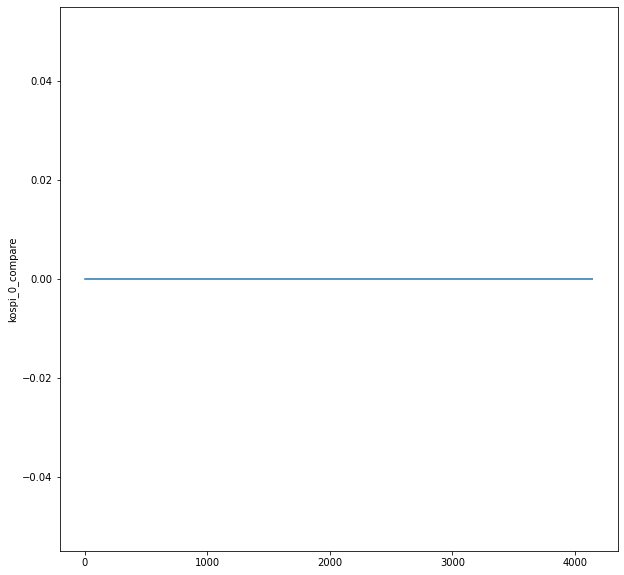

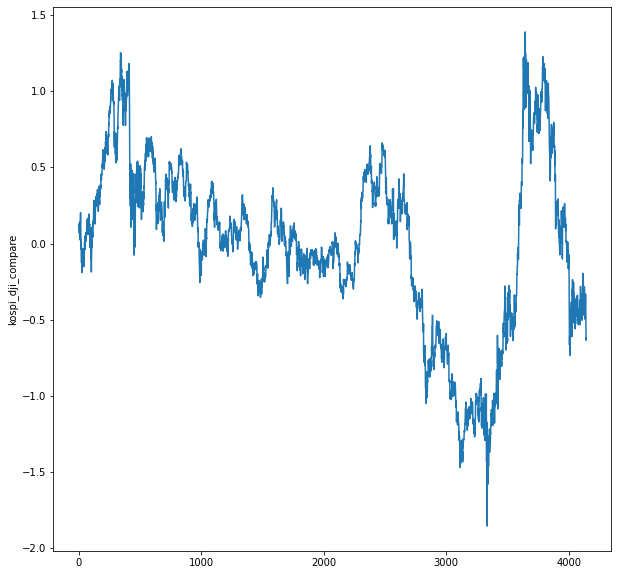

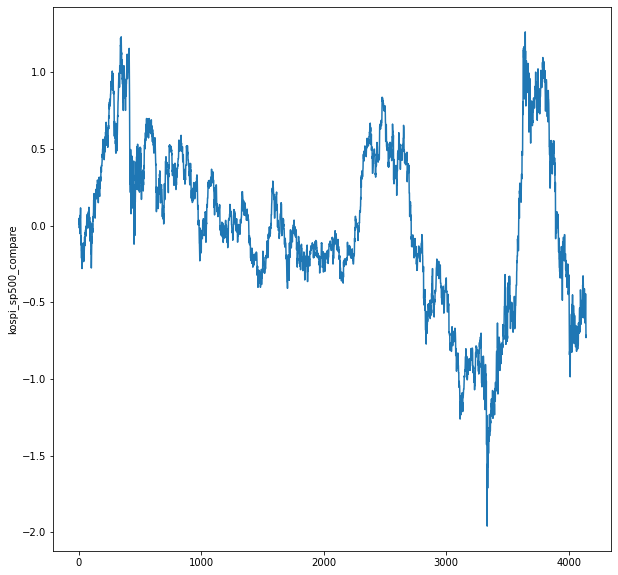

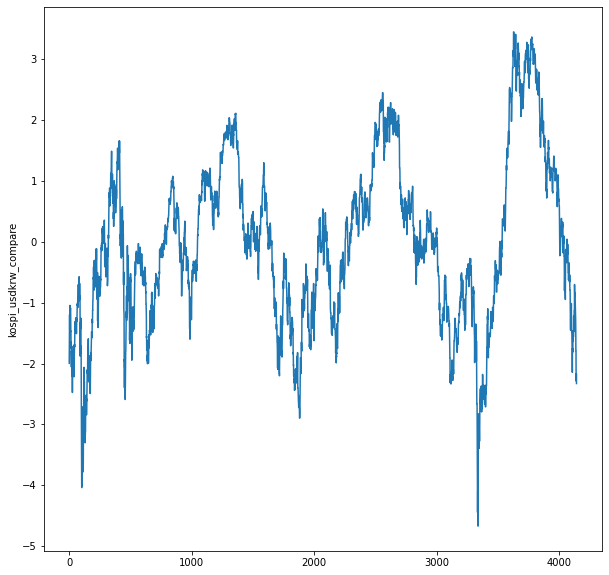

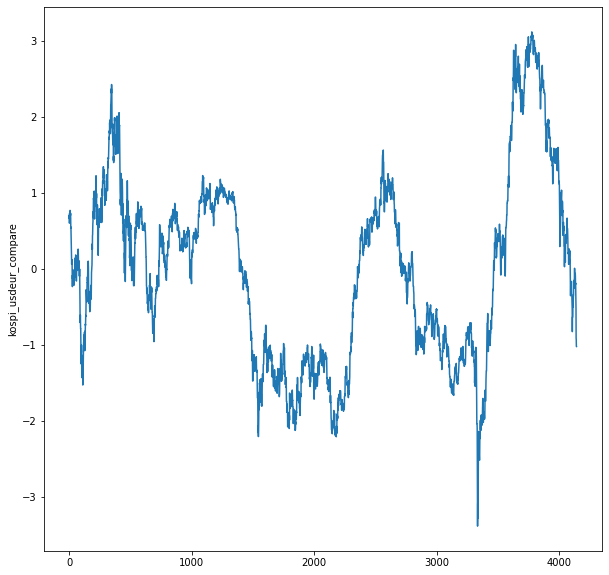

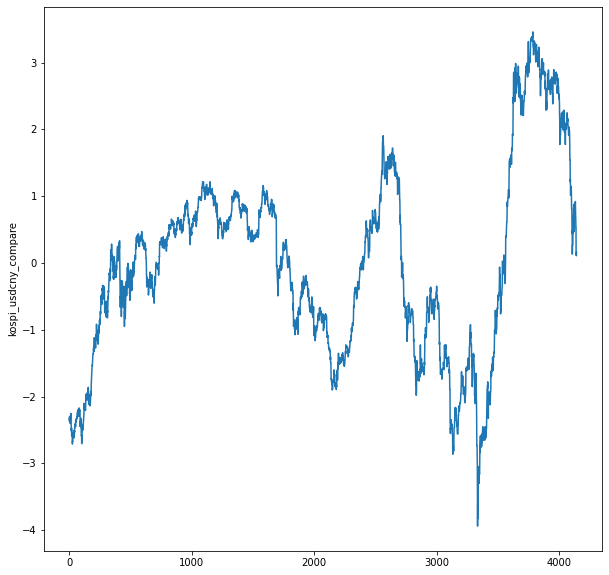

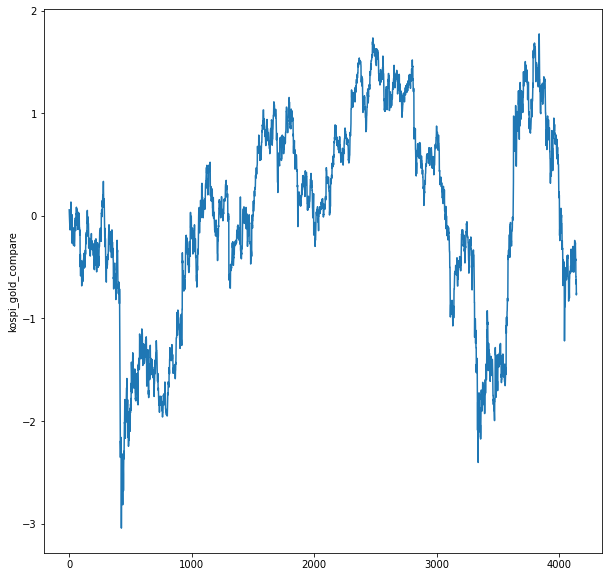

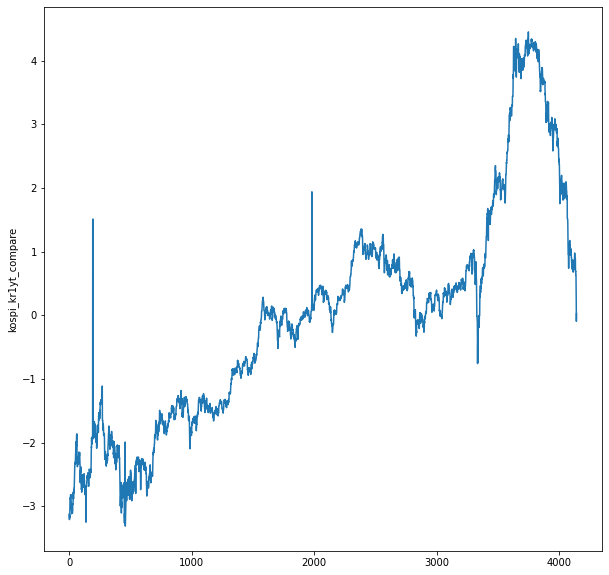

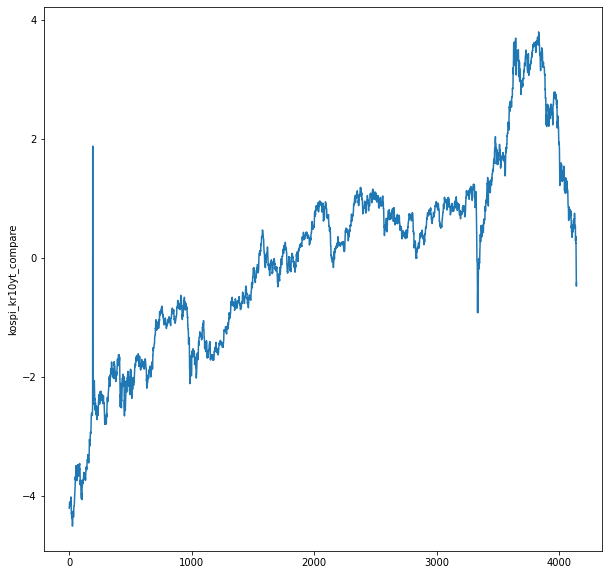

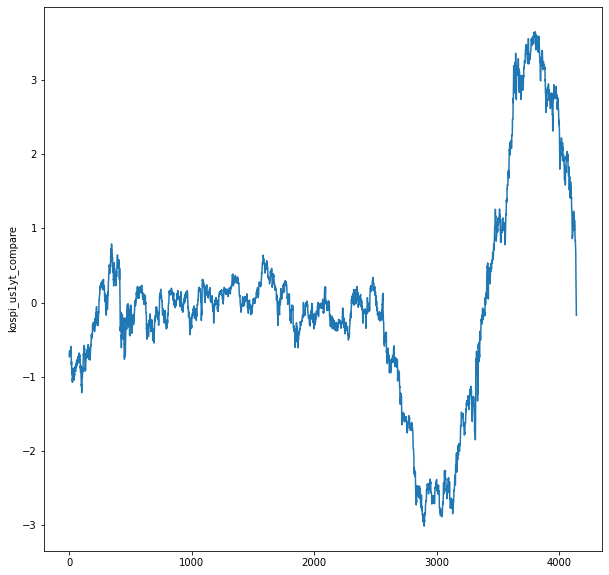

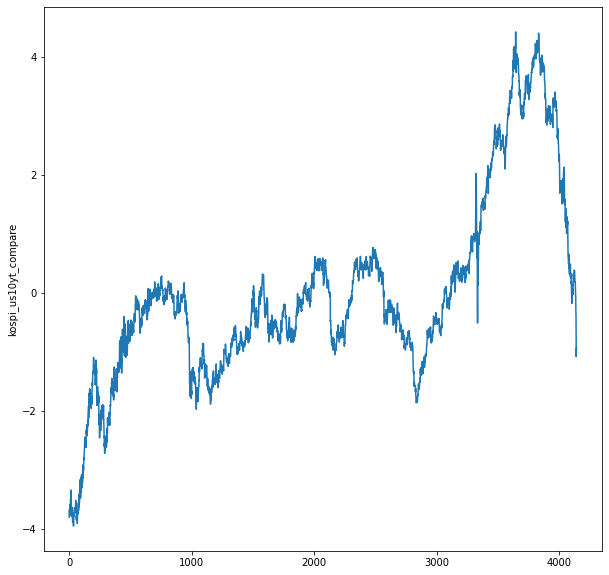

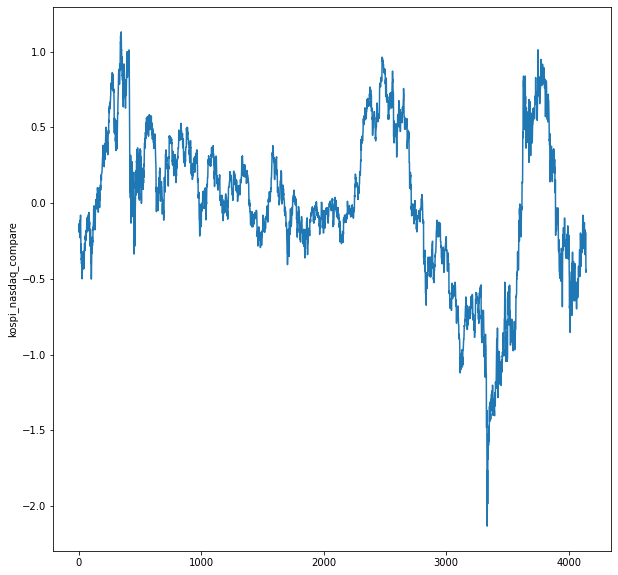

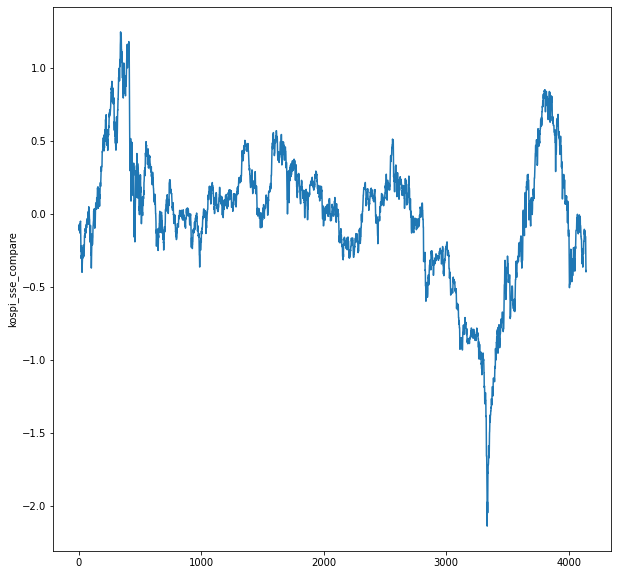

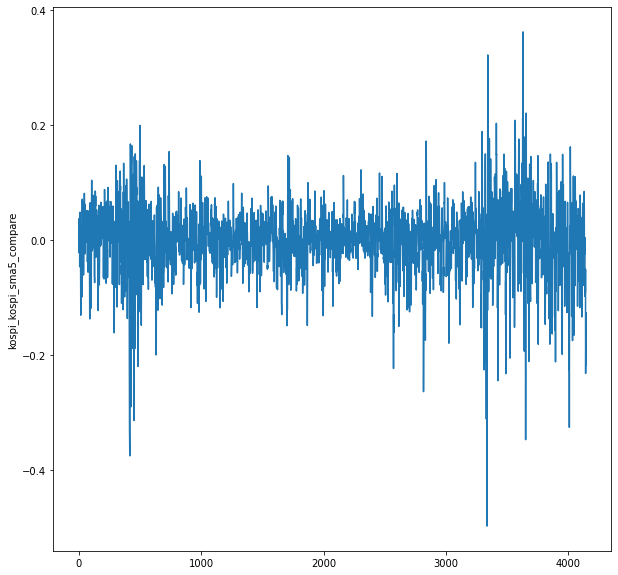

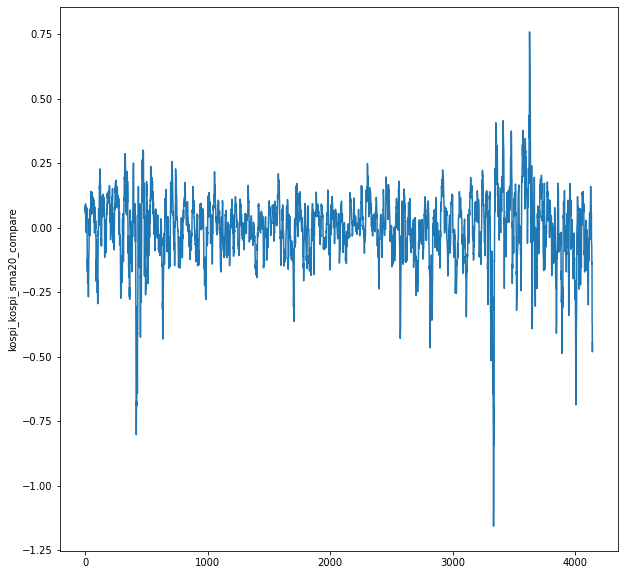

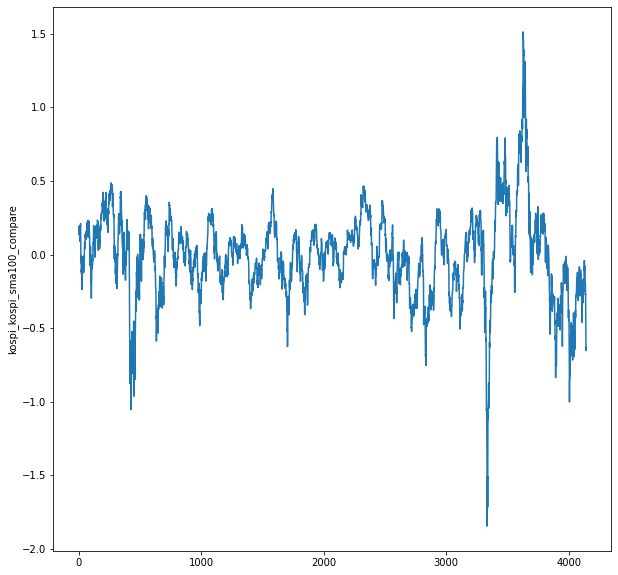

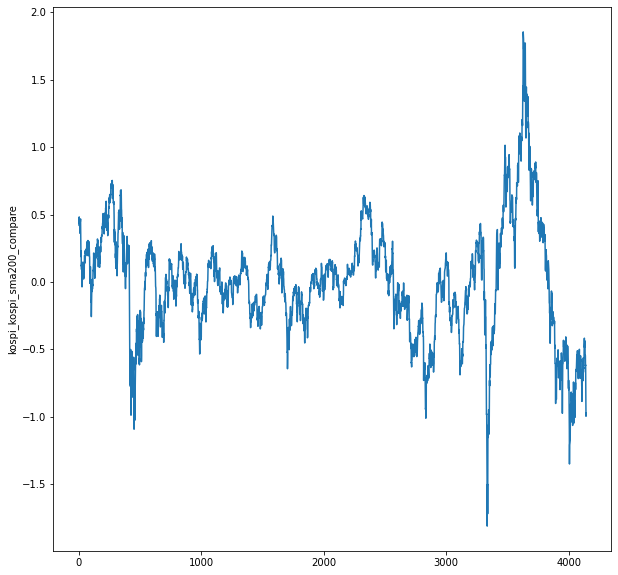

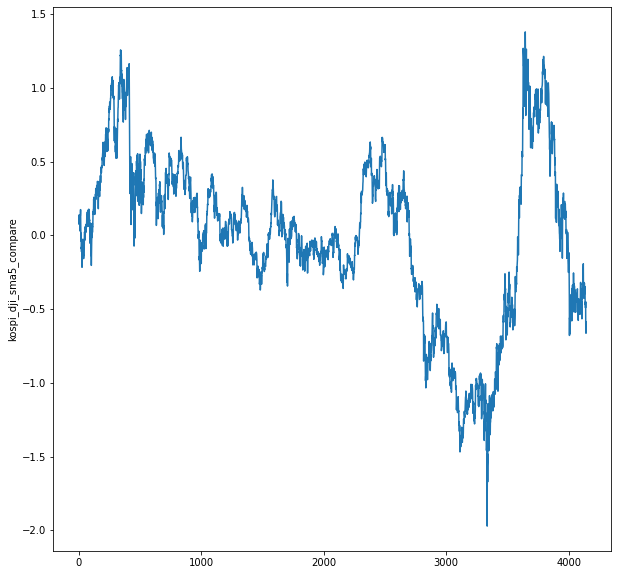

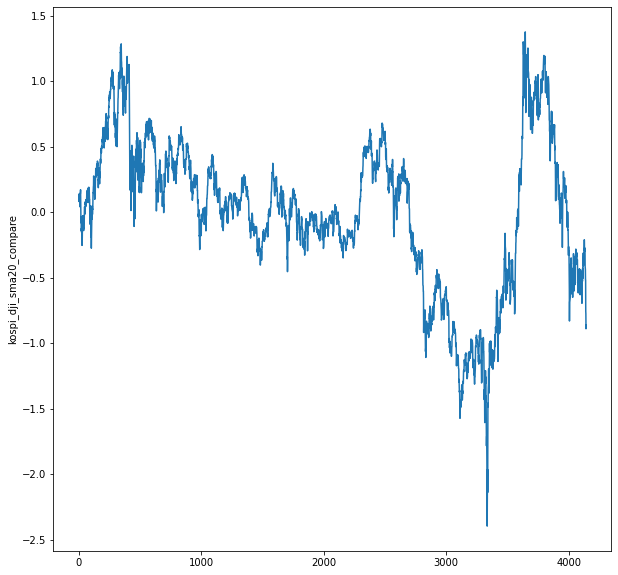

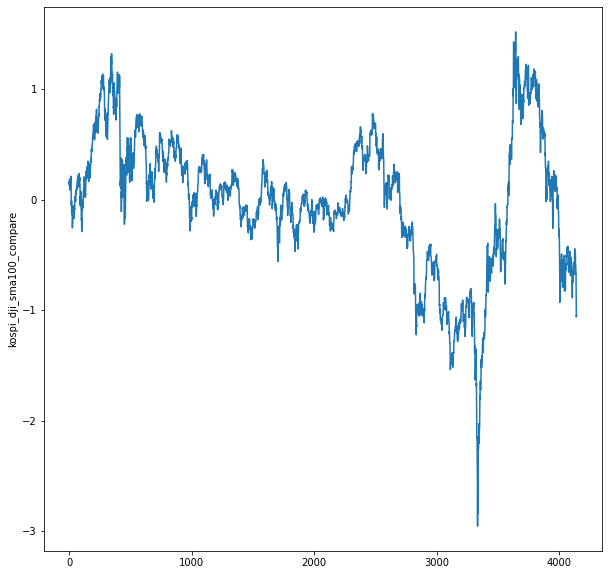

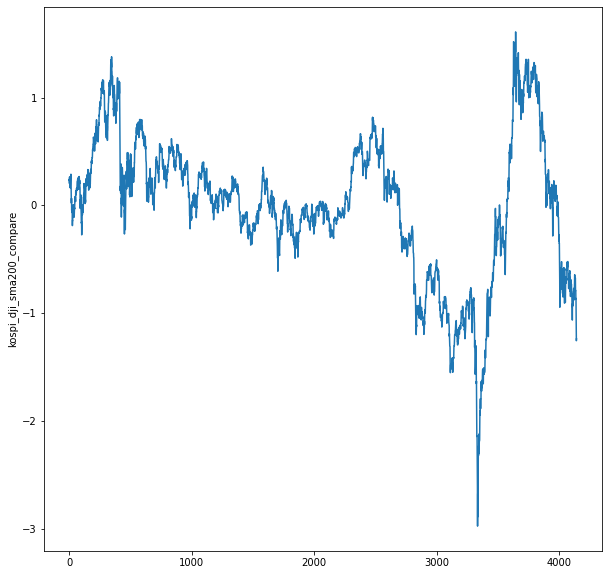

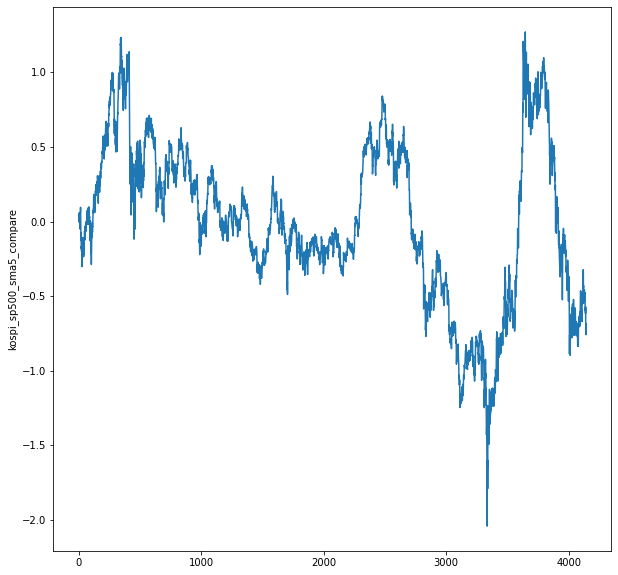

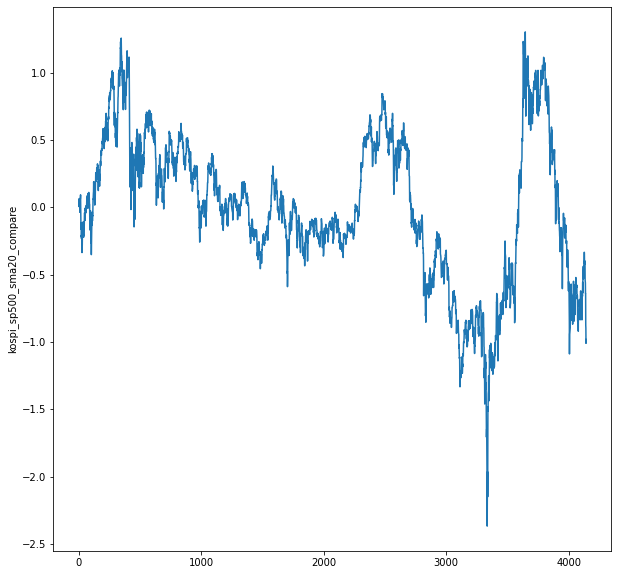

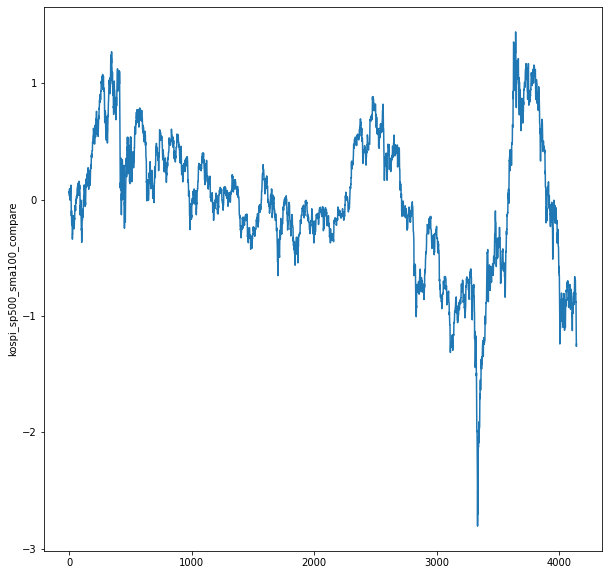

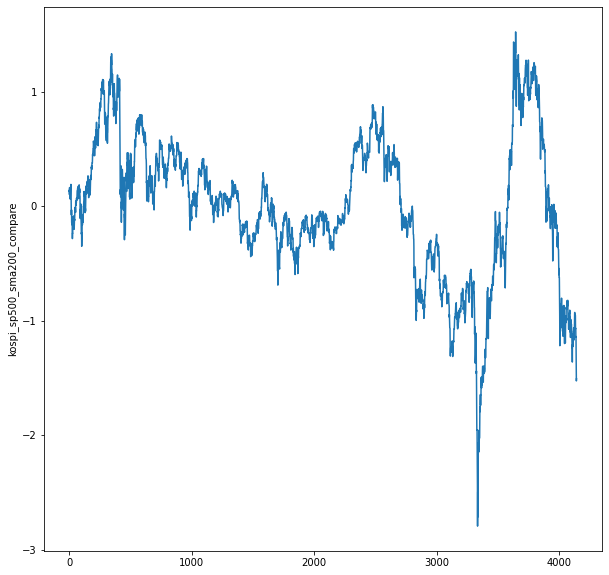

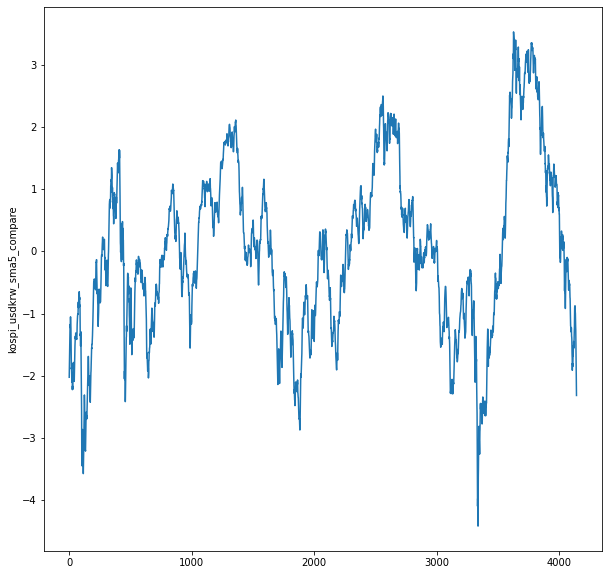

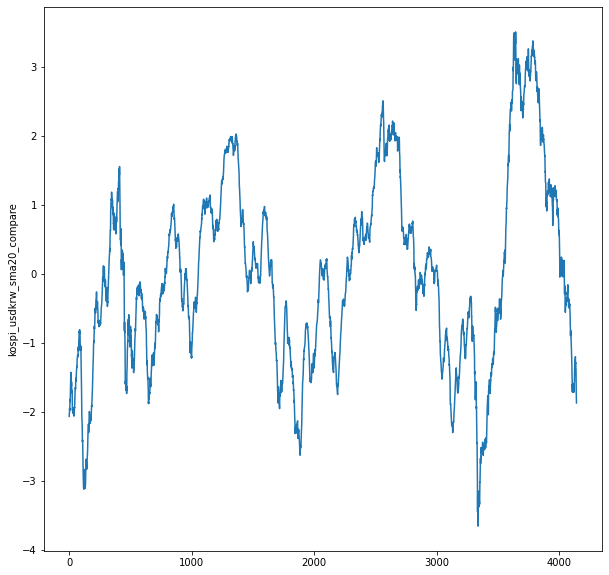

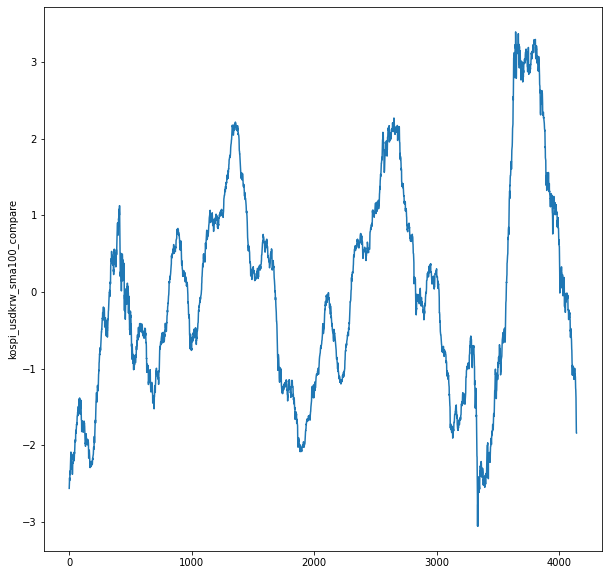

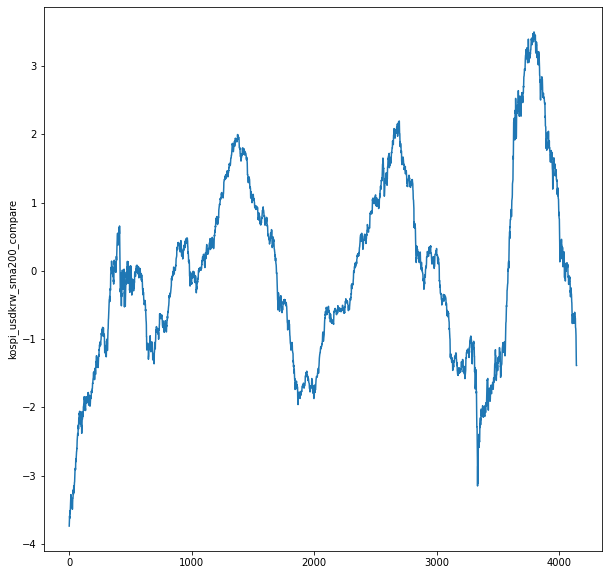

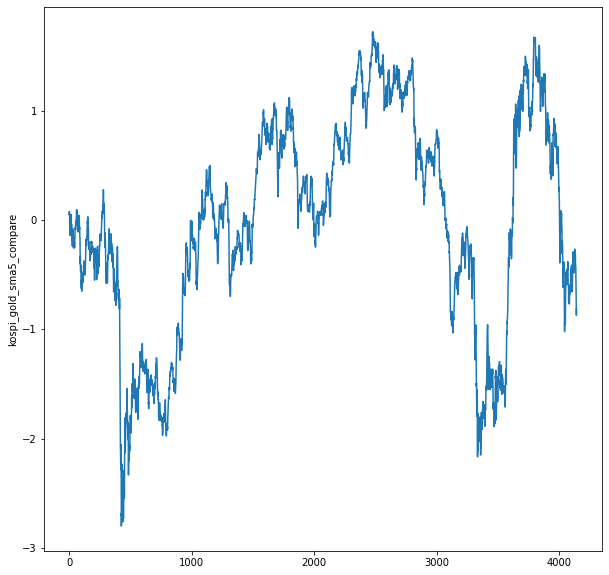

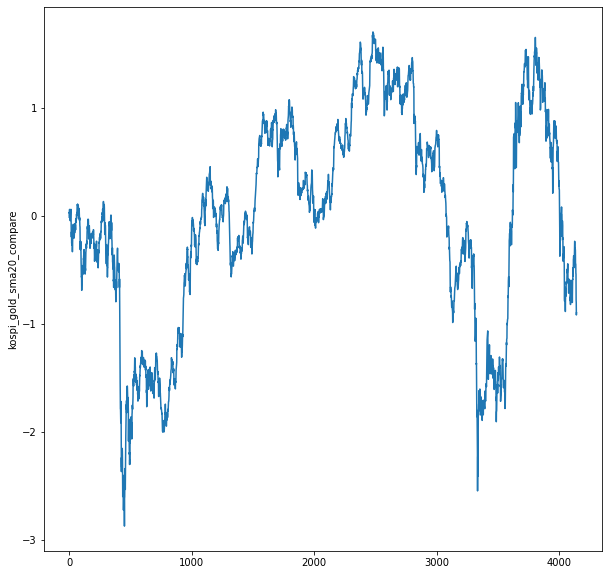

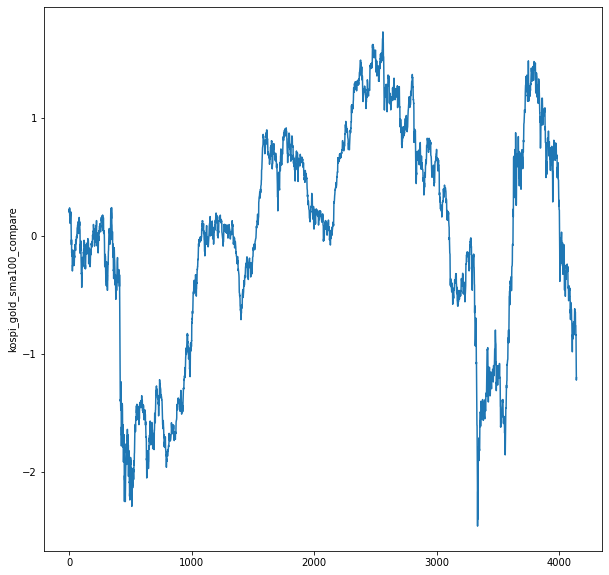

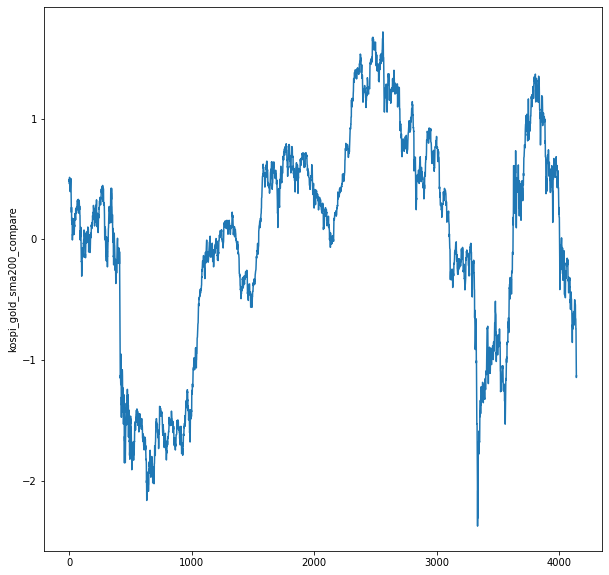

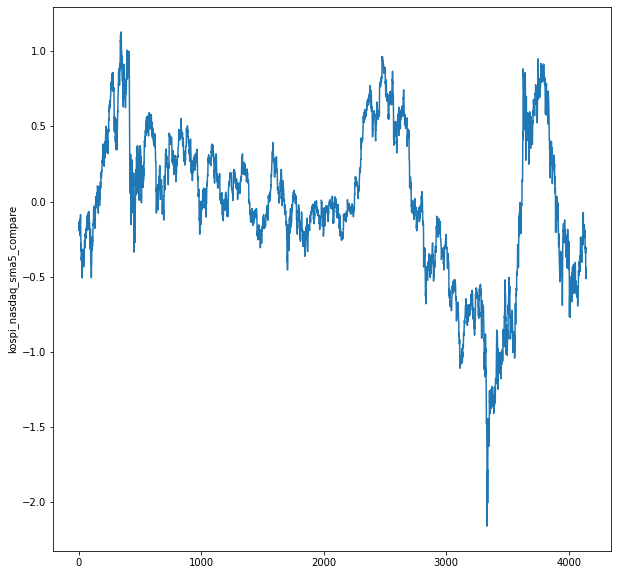

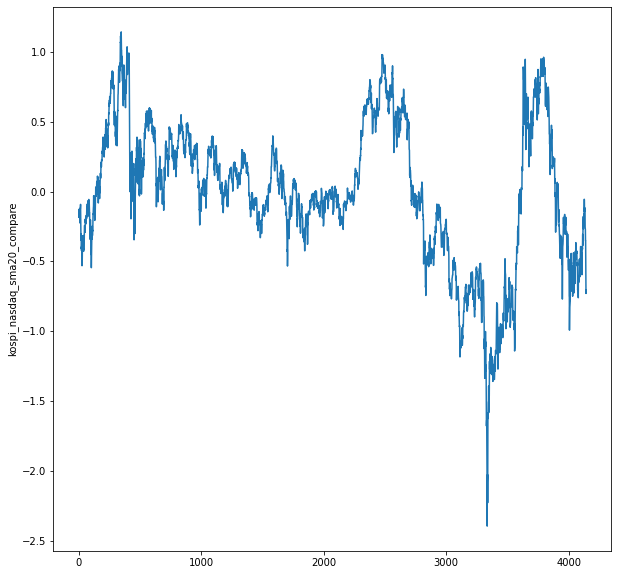

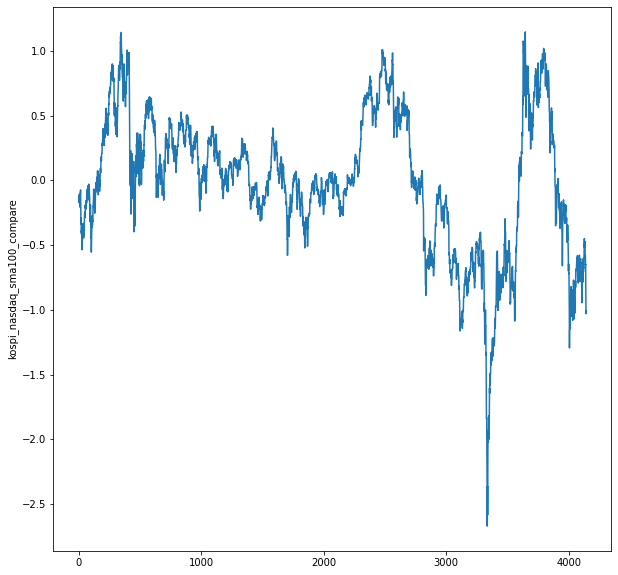

In [174]:

for i in ko_oth_compare.columns:
  plt.figure(figsize = (10, 10))
  sns.lineplot(data = ko_oth_compare[i])
  plt.show()

In [123]:
scaler_df[0]

array([-1.35270046, -1.4435513 , -1.36376805,  0.64216964, -1.96312773,
        1.00647253, -1.41102227,  1.76842236,  2.85669435, -0.62269931,
        2.44079481, -1.16633253, -1.25380969, -1.35675296, -1.41029918,
       -1.49835969, -1.79467277, -1.43268942, -1.43720375, -1.48185864,
       -1.5621491 , -1.35544017, -1.36243617, -1.38960488, -1.46041669,
        0.66984263,  0.71236115,  1.21056678,  2.38781238, -1.40330573,
       -1.34421195, -1.55538815, -1.81842719, -1.16199189, -1.17177923,
       -1.184083  , -1.21693206])

In [98]:
first_df.columns

Index(['index', 'kospi', 'dji', 'sp500', 'usdkrw', 'usdeur', 'usdcny', 'gold',
       'kr1yt', 'kr10yt', 'us1yt', 'us10yt', 'nasdaq', 'sse', 'kospi_sma5',
       'kospi_sma20', 'kospi_sma100', 'kospi_sma200', 'dji_sma5', 'dji_sma20',
       'dji_sma100', 'dji_sma200', 'sp500_sma5', 'sp500_sma20', 'sp500_sma100',
       'sp500_sma200', 'usdkrw_sma5', 'usdkrw_sma20', 'usdkrw_sma100',
       'usdkrw_sma200', 'gold_sma5', 'gold_sma20', 'gold_sma100',
       'gold_sma200', 'nasdaq_sma5', 'nasdaq_sma20', 'nasdaq_sma100',
       'nasdaq_sma200'],
      dtype='object')

In [17]:
last_index = full_df.index[(full_df['index'] == '2020-05-19')].tolist()[0]
last_index
# validation set 을 이렇게 구분해버려도 될까요?
# 시계열 데이터에서의 valid set은 어떻게 하나요?

3395

In [18]:
# Truncate df until 2020-05-19

truncated_df = full_df[:last_index+1]

In [19]:
truncated_df.tail(20)

,index,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,us1yt,us10yt,nasdaq,sse
3376,2020-04-30,1947.56,24345.72,2912.43,1212.94,0.9125,7.0600,1694.2,0.806,1.517,0.0890,0.646,8889.551,50000.0
3377,2020-05-01,1947.56,23723.69,2830.71,1224.89,0.9105,7.0602,1700.9,0.806,1.517,0.1010,0.618,8604.949,50000.0
3378,2020-05-02,1947.56,23723.69,2830.71,1224.89,0.9105,7.0602,1700.9,0.806,1.517,0.1010,0.618,8604.949,50000.0
3379,2020-05-03,1947.56,23723.69,2830.71,1224.89,0.9105,7.0602,1700.9,0.806,1.517,0.1014,0.618,8604.949,50000.0
3380,2020-05-04,1895.37,23749.76,2842.74,1224.14,0.9166,7.0622,1713.3,0.795,1.499,0.0940,0.631,8710.715,48500.0
3381,2020-05-05,1895.37,23883.09,2868.44,1222.47,0.9227,7.0622,1710.6,0.795,1.496,0.0940,0.662,8809.121,48500.0
3382,2020-05-06,1928.76,23664.64,2848.42,1228.55,0.9263,7.1031,1688.5,0.786,1.506,0.0860,0.709,8854.387,49200.0
3383,2020-05-07,1928.61,23875.89,2881.19,1219.61,0.9228,7.0825,1725.8,0.774,1.486,0.0840,0.639,8979.660,48800.0
3384,2020-05-08,1945.82,24331.32,2929.80,1219.65,0.9224,7.0732,1713.9,0.762,1.426,0.0960,0.685,9121.320,48800.0
3385,2020-05-09,1945.82,24331.32,2929.80,1219.65,0.9224,7.0732,1713.9,0.757,1.425,0.0960,0.685,9121.320,48800.0


In [20]:
split_index = truncated_df.index[(truncated_df['index'] == '2020-05-02')].tolist()[0]
split_index

3378

In [21]:
truncated_df = truncated_df.drop('index', axis=1)

In [22]:
# X_train, X_val, X_test = truncated_df[:int(len(truncated_df)*0.9)], \
#                          truncated_df[int(len(truncated_df)*0.9):2268], \
#                          truncated_df[2268:2278]

X_train, X_test = truncated_df[:split_index], truncated_df[split_index:last_index]

In [23]:
X_test.tail()

,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,us1yt,us10yt,nasdaq,sse
3390,1924.96,23625.34,2852.50,1227.03,0.9254,7.0935,1740.9,0.751,1.382,0.0840,0.617,8943.723,48000.0
3391,1927.28,23685.42,2863.70,1232.69,0.9245,7.1013,1756.3,0.748,1.384,0.0940,0.644,9014.559,47850.0
3392,1927.28,23685.42,2863.70,1232.69,0.9245,7.1013,1756.3,0.742,1.377,0.0940,0.644,9014.559,47850.0
3393,1927.28,23685.42,2863.70,1232.69,0.9245,7.1013,1756.3,0.742,1.377,0.1217,0.643,9014.559,47850.0
3394,1937.11,24597.37,2953.91,1225.13,0.9163,7.1086,1734.4,0.736,1.392,0.0910,0.726,9234.828,48800.0


In [24]:
print(X_train.shape, X_test.shape)

(3378, 13) (17, 13)


In [25]:
y_train, y_test = truncated_df[['kospi']][1:split_index+1], \
                  truncated_df[['kospi']][split_index+1:]

In [26]:
y_test.tail()

,kospi
3391,1927.28
3392,1927.28
3393,1927.28
3394,1937.11
3395,1980.61


In [27]:
print(y_train.shape, y_test.shape)

(3378, 1) (17, 1)


In [28]:
# Backup data

file_name = 'truncated_df.xlsx'
truncated_df.to_excel(file_name)

### 2-2 Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X_train)
scaled_X_train = minMaxScaler.transform(X_train)

In [31]:
scaled_X_test = minMaxScaler.transform(X_test)

#### 3. Learning

- 3-1) XGBoost

In [32]:
import xgboost
import math
from sklearn.metrics import mean_squared_error

In [33]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [34]:
xgb_model.fit(X_train, y_train)

[05:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

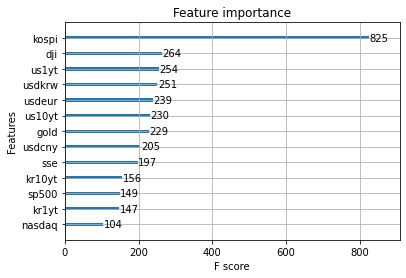

In [35]:
xgboost.plot_importance(xgb_model)

In [36]:
predictions = xgb_model.predict(X_test)
predictions

array([1948.4064, 1948.4064, 1895.4456, 1895.4045, 1936.9751, 1937.7408,
       1945.7427, 1945.7427, 1945.7427, 1942.9784, 1928.809 , 1952.2196,
       1933.087 , 1938.4053, 1938.4053, 1939.7557, 1950.1633],
      dtype=float32)

In [37]:
mse = mean_squared_error(y_test, predictions)
print('mse :', mse)
print('rmse :', math.sqrt(mse))

mse : 393.79718954187854
rmse : 19.84432386204878


In [38]:
xgb_model.fit(scaled_X_train, y_train)

[05:30:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

In [39]:
predictions = xgb_model.predict(scaled_X_test)
predictions

array([1948.4064, 1948.4064, 1895.4456, 1895.4045, 1936.9751, 1937.7408,
       1945.7427, 1945.7427, 1945.7427, 1942.9784, 1928.809 , 1952.2196,
       1933.087 , 1938.4053, 1938.4053, 1939.7557, 1950.1633],
      dtype=float32)

In [40]:
mse = mean_squared_error(y_test, predictions)
print('mse :', mse)
print('rmse :', math.sqrt(mse))

mse : 393.79718954187854
rmse : 19.84432386204878


- 3-2) XGBRegressor with GridSearchCV

In [41]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [42]:
# Various hyper-parameters to tune

xgb1 = XGBRegressor()
parameters = {'nthread':[3], # when use hyperthread, xgboost may become slower
              'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09],
              'max_depth': [3, 4, 5, 6, 7],
              'min_child_weight': [3, 4, 5],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100, 300, 500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits
[05:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_child_weight': [3, 4, 5],
                         'n_estimators': [100, 300, 500], 'nthread': [3],
                         'subsample': [0.7]},
             verbose=True)

In [43]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.6978597778345268
{'colsample_bytree': 0.7, 'learning_rate': 0.09, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 3, 'subsample': 0.7}


In [44]:
predictions = xgb_grid.predict(X_test)
predictions

array([1947.199 , 1947.199 , 1898.066 , 1896.0826, 1956.256 , 1935.7604,
       1944.9783, 1944.9783, 1944.7307, 1954.9199, 1928.7308, 1961.4761,
       1947.4053, 1951.641 , 1950.3099, 1944.5563, 1956.0411],
      dtype=float32)

In [45]:
mse = mean_squared_error(y_test, predictions)
print('mse :', mse)
print('rmse :', math.sqrt(mse))

mse : 555.6460594499104
rmse : 23.572145838890236


In [46]:
xgb_grid.fit(scaled_X_train, y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits
[05:40:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_child_weight': [3, 4, 5],
                         'n_estimators': [100, 300, 500], 'nthread': [3],
                         'subsample': [0.7]},
             verbose=True)

In [47]:
predictions = xgb_grid.predict(scaled_X_test)
predictions

array([1943.748 , 1943.748 , 1901.118 , 1899.992 , 1952.1913, 1938.5756,
       1945.2517, 1945.2517, 1943.7863, 1945.8085, 1923.6598, 1955.8151,
       1937.6769, 1947.707 , 1946.376 , 1939.7628, 1944.7717],
      dtype=float32)

In [48]:
mse = mean_squared_error(y_test, predictions)
print('mse :', mse)
print('rmse :', math.sqrt(mse))

mse : 462.8407419267111
rmse : 21.513733797895497


- 3-3) LSTM

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = truncated_df.columns.tolist()

# 스케일 후 columns
scaled = scaler.fit_transform(truncated_df)
scaled

array([[0.20910964, 0.04517909, 0.04671323, ..., 0.95212156, 0.0280413 ,
        0.05286885],
       [0.20426987, 0.04457804, 0.04820674, ..., 0.93491972, 0.02807884,
        0.05819672],
       [0.21715839, 0.0446616 , 0.04846905, ..., 0.95384174, 0.02709248,
        0.06598361],
       ...,
       [0.41176625, 0.70470588, 0.77895726, ..., 0.04042431, 0.89610609,
        0.70184426],
       [0.4203849 , 0.75061339, 0.8171241 , ..., 0.06422018, 0.92461843,
        0.72131148],
       [0.4585244 , 0.73095514, 0.80402104, ..., 0.05447248, 0.91818212,
        0.75204918]])

In [51]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [52]:
# # Normalization 미적용

# df = truncated_df.copy()
# df

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df, \
    df['kospi'], test_size=0.2, random_state=0, shuffle=False)

In [54]:
X_train.shape, y_train.shape

((2716, 13), (2716,))

In [55]:
X_test.shape, y_test.shape

((680, 13), (680,))

In [56]:
X_train

,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,us1yt,us10yt,nasdaq,sse
0,0.209110,0.045179,0.046713,0.534663,0.066944,0.692193,0.081049,0.906005,1.000000,0.034469,0.952122,0.028041,0.052869
1,0.204270,0.044578,0.048207,0.497436,0.074922,0.690698,0.081526,0.906005,0.988930,0.030507,0.934920,0.028079,0.058197
2,0.217158,0.044662,0.048469,0.455651,0.067291,0.691577,0.102741,0.898172,0.992620,0.026149,0.953842,0.027092,0.065984
3,0.197983,0.046332,0.050394,0.489839,0.083593,0.691841,0.099404,0.895561,0.977860,0.024168,0.953268,0.026958,0.054508
4,0.208338,0.046902,0.051786,0.452042,0.066944,0.691401,0.105483,0.874674,0.983395,0.024168,0.955849,0.029174,0.057787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,0.761466,0.734205,0.717470,0.401861,0.629206,0.509759,0.244100,0.481723,0.471402,0.713154,0.676032,0.701390,0.677254
2712,0.761466,0.734205,0.717470,0.401861,0.629206,0.509759,0.244100,0.481723,0.471402,0.713154,0.676032,0.701390,0.677254
2713,0.761466,0.734205,0.717470,0.401861,0.629206,0.509759,0.244100,0.481723,0.471402,0.709984,0.674885,0.701390,0.677254
2714,0.713603,0.736005,0.720998,0.416448,0.640652,0.551081,0.228844,0.481723,0.466974,0.755151,0.679186,0.708818,0.654713


In [57]:
import tensorflow as tf

https://webnautes.tistory.com/1527

In [58]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=7, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [59]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [60]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [61]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [63]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=12,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [64]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [65]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [66]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/100
     11/Unknown - 3s 11ms/step - loss: 0.0879 - mse: 0.1759
Epoch 1: val_loss improved from inf to 0.05596, saving model to tmp/ckeckpointer.ckpt
13/13 [==============================] - 4s 100ms/step - loss: 0.0858 - mse: 0.1715 - val_loss: 0.0560 - val_mse: 0.1119
Epoch 2/100
10/13 [======================>.......] - ETA: 0s - loss: 0.0296 - mse: 0.0591
Epoch 2: val_loss improved from 0.05596 to 0.00491, saving model to tmp/ckeckpointer.ckpt
13/13 [==============================] - 0s 20ms/step - loss: 0.0261 - mse: 0.0523 - val_loss: 0.0049 - val_mse: 0.0098
Epoch 3/100
10/13 [======================>.......] - ETA: 0s - loss: 0.0031 - mse: 0.0063
Epoch 3: val_loss improved from 0.00491 to 0.00480, saving model to tmp/ckeckpointer.ckpt
13/13 [==============================] - 0s 22ms/step - loss: 0.0032 - mse: 0.0065 - val_loss: 0.0048 - val_mse: 0.0096
Epoch 4/100
10/13 [======================>.......] - ETA: 0s - loss: 0.0035 - mse: 0.0071
Epoch 4: val_loss improved from

In [67]:
model.load_weights(filename)

In [68]:
pred = model.predict(test_data)

In [69]:
pred.shape

(95, 1)

In [70]:
test = []
for i, value in enumerate(y_test):
    if (i+1) % 7 == 0:
        test.append(value)

In [71]:
test = test[1:]
print(len(test))

96


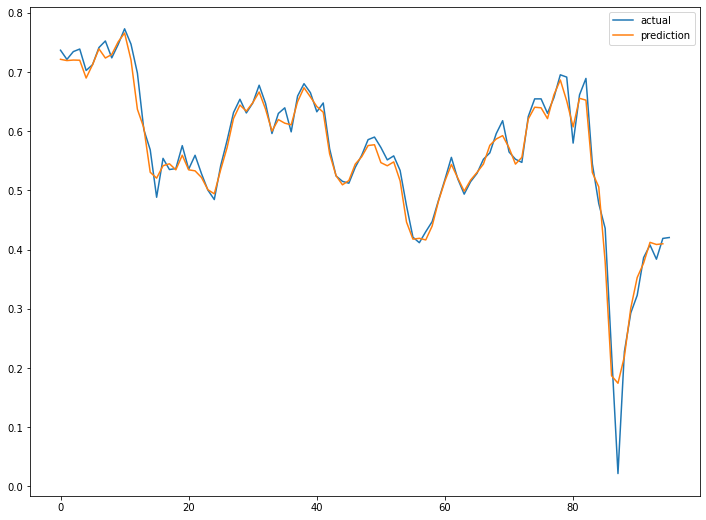

In [72]:
plt.figure(figsize=(12, 9))
# plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()